Loading the DataSet

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_excel('flight_price.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
print("the description of DataSet is \n")
data.info()

the description of DataSet is 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
print("Type columns of the DataSet are \n")
data.columns

Type columns of the DataSet are 



Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [10]:
data['Total_Stops_cleaned'] = data['Total_Stops'].map({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4})

In [11]:
data['Total_Stops_cleaned'] = data['Total_Stops_cleaned'].fillna(0)
data['Total_Stops_cleaned'].unique()

array([0., 2., 1., 3., 4.])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  object 
 1   Date_of_Journey      10683 non-null  object 
 2   Source               10683 non-null  object 
 3   Destination          10683 non-null  object 
 4   Route                10682 non-null  object 
 5   Dep_Time             10683 non-null  object 
 6   Arrival_Time         10683 non-null  object 
 7   Duration             10683 non-null  object 
 8   Total_Stops          10682 non-null  object 
 9   Additional_Info      10683 non-null  object 
 10  Price                10683 non-null  int64  
 11  Total_Stops_cleaned  10683 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1001.7+ KB


In [13]:
data.drop('Total_Stops', axis=1, inplace=True)

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Price',
       'Total_Stops_cleaned'],
      dtype='object')

In [15]:
data.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  1
Dep_Time               0
Arrival_Time           0
Duration               0
Additional_Info        0
Price                  0
Total_Stops_cleaned    0
dtype: int64

In [16]:
data['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

Extracting Hours and Minutes in the Flight Duration

In [17]:
def extract_total_mins(duration):
    hours=0
    mins=0

    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    
    if 'm' in duration:
        if 'h' in duration:
            mins = int(duration.split('h')[1].strip().replace('m', '').strip())
        else:
            mins = int(duration.strip().replace('m', '').strip())
    
    return hours*60 + mins


In [18]:
data['Duration_total_mins'] = data['Duration'].apply(extract_total_mins)
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Price',
       'Total_Stops_cleaned', 'Duration_total_mins'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  object 
 1   Date_of_Journey      10683 non-null  object 
 2   Source               10683 non-null  object 
 3   Destination          10683 non-null  object 
 4   Route                10682 non-null  object 
 5   Dep_Time             10683 non-null  object 
 6   Arrival_Time         10683 non-null  object 
 7   Duration             10683 non-null  object 
 8   Additional_Info      10683 non-null  object 
 9   Price                10683 non-null  int64  
 10  Total_Stops_cleaned  10683 non-null  float64
 11  Duration_total_mins  10683 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1001.7+ KB


In [20]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Total_Stops_cleaned,Duration_total_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897,0.0,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,2.0,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882,2.0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,1.0,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1.0,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,No info,4107,0.0,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,No info,4145,0.0,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,No info,7229,0.0,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,No info,12648,0.0,160


In [21]:
if 'Duration' in data.columns:
    data.drop('Duration', axis=1, inplace=True)


In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Additional_Info', 'Price',
       'Total_Stops_cleaned', 'Duration_total_mins'],
      dtype='object')

Extracting Date, Month and Year from Date of Journey

In [23]:
data['Journey_Date'] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data['Journey_Month'] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data['Journey_Year'] = data['Date_of_Journey'].str.split('/').str[2].astype(int)

In [24]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [25]:
data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,Total_Stops_cleaned,Duration_total_mins,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,3897,0.0,170,24,3,2019


In [26]:
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [27]:
data['Dep_hour'] = data['Dep_Time'].str.split(':').str[0].astype(int)
data['Dep_min'] = data['Dep_Time'].str.split(':').str[1].astype(int)

data['Arrival_hour'] = data['Arrival_Time'].str.split(':').str[0].astype(int)
data['Arrival_min'] = data['Arrival_Time'].str.split(':').str[1].astype(int)


In [28]:
data[['Arrival_Time', 'Arrival_hour', 'Arrival_min']].head()

,Arrival_Time,Arrival_hour,Arrival_min
0,01:10,1,10
1,13:15,13,15
2,04:25,4,25
3,23:30,23,30
4,21:35,21,35


In [29]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Additional_Info', 'Price', 'Total_Stops_cleaned',
       'Duration_total_mins', 'Journey_Date', 'Journey_Month', 'Journey_Year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [30]:
data.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True, errors='ignore')


In [31]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'Total_Stops_cleaned', 'Duration_total_mins', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  object 
 1   Source               10683 non-null  object 
 2   Destination          10683 non-null  object 
 3   Route                10682 non-null  object 
 4   Additional_Info      10683 non-null  object 
 5   Price                10683 non-null  int64  
 6   Total_Stops_cleaned  10683 non-null  float64
 7   Duration_total_mins  10683 non-null  int64  
 8   Journey_Date         10683 non-null  int64  
 9   Journey_Month        10683 non-null  int64  
 10  Journey_Year         10683 non-null  int64  
 11  Dep_hour             10683 non-null  int64  
 12  Dep_min              10683 non-null  int64  
 13  Arrival_hour         10683 non-null  int64  
 14  Arrival_min          10683 non-null  int64  
dtypes: float64(1), int64(9), object(5)
m

In [33]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Encoding the Airlines

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
top_airlines = data['Airline'].value_counts().nlargest(5).index
data['Airline'] = data['Airline'].apply(lambda x: x if x in top_airlines else 'Other')
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'Other'], dtype=object)

In [36]:
encoder = OneHotEncoder()
encoded_arr = encoder.fit_transform(data[['Airline']]).toarray()

In [37]:
encoded_arr

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]], shape=(10683, 6))

In [38]:
encoded_df = pd.DataFrame(encoded_arr, columns=encoder.get_feature_names_out(['Airline']), index=data.index)

In [39]:
encoded_df.head()

,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet
0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
encoded_data = pd.concat([data.drop('Airline', axis=1), encoded_df], axis=1)

In [41]:
encoded_data.head()

,Source,Destination,Route,Additional_Info,Price,Total_Stops_cleaned,Duration_total_mins,Journey_Date,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet
0,Banglore,New Delhi,BLR → DEL,No info,3897,0.0,170,24,3,2019,22,20,1,10,0.0,1.0,0.0,0.0,0.0,0.0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,2.0,445,1,5,2019,5,50,13,15,1.0,0.0,0.0,0.0,0.0,0.0
2,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,2.0,1140,9,6,2019,9,25,4,25,0.0,0.0,1.0,0.0,0.0,0.0
3,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,1.0,325,12,5,2019,18,5,23,30,0.0,1.0,0.0,0.0,0.0,0.0
4,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1.0,285,1,3,2019,16,50,21,35,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
encoded_data.columns

Index(['Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'Total_Stops_cleaned', 'Duration_total_mins', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet'],
      dtype='object')

In [43]:
encoded_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [44]:
encoded_data['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

Encoding both source and Destination

In [45]:
encoded_data.head(1)

,Source,Destination,Price,Total_Stops_cleaned,Duration_total_mins,Journey_Date,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet
0,Banglore,New Delhi,3897,0.0,170,24,3,2019,22,20,1,10,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
encoded_data_arr = encoder.fit_transform(data[['Source', 'Destination']]).toarray()

In [47]:
encoded_data_df = pd.DataFrame(encoded_data_arr, columns=encoder.get_feature_names_out(['Source', 'Destination']), index=encoded_data.index)

In [48]:
encoded_data_df.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
encoded_data_final = pd.concat([encoded_data, encoded_data_df], axis=1)

In [50]:
encoded_data_final.columns

Index(['Source', 'Destination', 'Price', 'Total_Stops_cleaned',
       'Duration_total_mins', 'Journey_Date', 'Journey_Month', 'Journey_Year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_Other', 'Airline_SpiceJet',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [51]:
encoded_data_final.drop(['Source', 'Destination', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True, errors='ignore')

In [52]:
encoded_data_final.head()

,Price,Total_Stops_cleaned,Duration_total_mins,Journey_Date,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,0.0,170,24,3,2019,22,20,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7662,2.0,445,1,5,2019,5,50,13,15,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,13882,2.0,1140,9,6,2019,9,25,4,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6218,1.0,325,12,5,2019,18,5,23,30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13302,1.0,285,1,3,2019,16,50,21,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
encoded_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      10683 non-null  int64  
 1   Total_Stops_cleaned        10683 non-null  float64
 2   Duration_total_mins        10683 non-null  int64  
 3   Journey_Date               10683 non-null  int64  
 4   Journey_Month              10683 non-null  int64  
 5   Journey_Year               10683 non-null  int64  
 6   Dep_hour                   10683 non-null  int64  
 7   Dep_min                    10683 non-null  int64  
 8   Arrival_hour               10683 non-null  int64  
 9   Arrival_min                10683 non-null  int64  
 10  Airline_Air India          10683 non-null  float64
 11  Airline_IndiGo             10683 non-null  float64
 12  Airline_Jet Airways        10683 non-null  float64
 13  Airline_Multiple carriers  10683 non-null  flo

Model Training of the DataSet

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_data, test_data = train_test_split(encoded_data_final, test_size=0.2)

In [56]:
print(train_data.shape)
print(test_data.shape)
print(encoded_data_final.shape)

(8546, 27)
(2137, 27)
(10683, 27)


In [57]:
X = encoded_data_final.drop('Price', axis=1)


In [58]:
X.head()

,Total_Stops_cleaned,Duration_total_mins,Journey_Date,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,170,24,3,2019,22,20,1,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,445,1,5,2019,5,50,13,15,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1140,9,6,2019,9,25,4,25,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,325,12,5,2019,18,5,23,30,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,285,1,3,2019,16,50,21,35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
Y = encoded_data_final['Price']

In [61]:
encoded_data_final['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10683 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype
--------------  -----
10683 non-null  int64
dtypes: int64(1)
memory usage: 83.6 KB


In [ ]:
Y['Price'].astype(int)

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [63]:
print(encoded_data_final['Price'].head())

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64


In [64]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10683 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype
--------------  -----
10683 non-null  int64
dtypes: int64(1)
memory usage: 83.6 KB


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

8546
8546
2137
2137


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [68]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, y_pred)
rmse = root_mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Report for the Linear Regression Model\n")

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Report for the Linear Regression Model

Mean Absolute Error (MAE): 2036.8269341621203
Root Mean Squared Error (RMSE): 3043.035075571484
R² Score: 0.5624609089432415


Using Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, Y_train)
y_pred_rfr=model_rfr.predict(X_test)

In [72]:
print("Report for the Random Forest Regressor Model\n")

mae_rfr = mean_absolute_error(Y_test, y_pred_rfr)
rmse_rfr = root_mean_squared_error(Y_test, y_pred_rfr)
r2_rfr = r2_score(Y_test, y_pred_rfr)

print("Mean Absolute Error (MAE):", mae_rfr)
print("Root Mean Squared Error (RMSE):", rmse_rfr)
print("R² Score:", r2_rfr)



Report for the Random Forest Regressor Model

Mean Absolute Error (MAE): 1201.0206955945578
Root Mean Squared Error (RMSE): 2165.112256932727
R² Score: 0.7785050744842684


Static Prediction using Test Sample

In [94]:
index = 10
sample_input = X_test.iloc[[index]]
sample_input


,Total_Stops_cleaned,Duration_total_mins,Journey_Date,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
5412,0.0,170,15,5,2019,4,0,6,50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [107]:
predicted_price_lr = model.predict(sample_input)[0]
actual_price = Y_test.iloc[index]


In [ ]:
print("Price Prediction using LInear Regression Model\n")
print(f"Predicted Flight Price : ₹{round(predicted_price_lr, 2)}")
print(f"Actual Flight Price    : ₹{round(actual_price, 2)}")
print(f"The Price difference is: ₹{round(actual_price-predicted_price_lr, 2)}")


Price Prediction using LInear Regression Model

Predicted Flight Price : ₹3573.48
Actual Flight Price    : ₹3943
The Price difference is: ₹369.52


In [109]:
predicted_price_rfr = model_rfr.predict(sample_input)[0]

In [153]:
print("Price Prediction using Random Forest Regression Model\n")
print(f"Predicted Flight Price : ₹{round(predicted_price_rfr, 2)}")
print(f"Actual Flight Price    : ₹{round(actual_price, 2)}")
print(f"The Price difference is: ₹{round(actual_price-predicted_price_rfr, 2)}")

Price Prediction using Random Forest Regression Model

Predicted Flight Price : ₹4189.01
Actual Flight Price    : ₹3943
The Price difference is: ₹-246.01


Plotting the Comparison

In [111]:
compared_df = pd.DataFrame({
    'Model' : ['Actual', 'Linear Regression', 'Random Forest Regressor'],
    'Price' : [actual_price, predicted_price_lr, predicted_price_rfr]
})

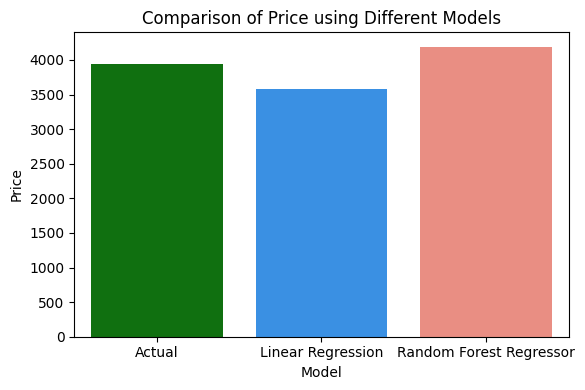

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=compared_df, x='Model', y='Price', hue='Model',
            legend=False, palette=['green', 'dodgerblue', 'salmon'] )
plt.title("Comparison of Price using Different Models")
plt.tight_layout()
plt.xlabel('Model')
plt.show()
